## Set the computations 

In [1]:
# Import modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
%matplotlib inline 

In [2]:
# Set visuales 
coloors = ['#739354', '#875590', '#7dd3ec','#f5c9d0' , '#7dd3ec']

In [3]:
# read major final demand sectors 
sectors = pd.read_excel('../Data/Meta.xlsx', sheet_name = 'Data').drop('Eora_classification', axis =1)
sec_map = {1: 'Primary industry', 21 : 'Light manufacturing',23 : 'Heavey manufacturing', 3 : 'Tertiary industry' }
sectors['Industry_category'] = sectors['Industry_category'].map(sec_map)
sectors.head(3)

,Sector,Industry_category
0,Food,Primary industry
1,Food,Primary industry
2,Goods,Primary industry


## 1. CES data

In [4]:
# Set general path 
ces_path = '../Data/CES/'
# Read the CES data 
y = pd.read_csv(ces_path + 'urban.ces.csv', index_col = 'City')
y.head(3)

,Category,Country iso3,0,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,25
City,,,,,,,,,,,,,,,,,,,,,
Abidjan,LMIC,CIV,0.0,0.0,0.0,356.394219,45.330338,0.0,0.0,0.0,...,0.0,0.000000,89.879362,51.582868,0.0,0.0,24.305724,0.0,61.741964,0.0
Addu,UMIC,MDV,0.0,0.0,0.0,813.932292,116.276042,0.0,0.0,0.0,...,0.0,116.276042,377.864583,232.552083,0.0,0.0,436.002604,0.0,174.414062,0.0
Agneby-Tiassa,LMIC,CIV,0.0,0.0,0.0,327.301433,44.229212,0.0,0.0,0.0,...,0.0,0.000000,110.171241,58.703749,0.0,0.0,59.507327,0.0,6.641163,0.0


## 2. Compute the TIV ($F$)

For this anlysis we're using [Eora26](https://worldmrio.com/eora26/) (v199.82)

In [5]:
# Read modules 
import numpy as np
import pandas as pd
import os
import re

We need to compute the the Total Intensity Vector $(F)$ for these countries: *['CIV', 'MDV', 'MEX', 'DZA', 'LKA', 'CHN', 'BGD', 'ALB', 'ZWE','EGY', 'ZAF', 'MAR', 'NAM', 'BWA', 'VNM', 'ZMB', 'MNE', 'ASM', 'CRI', 'GEO', 'TUN']*

To compute the the TIF, we need to preform the following operations: 
- compute the Xout 
- compute the direct intensity vector (f) 
- comput technical coefficient matrix
- compute Wassily Leontief inverse 
- compute the Total intesnity verctor 

In [26]:
# set paths 
bp_path = '../Data/Eora/Eora_BP/'

# Read the index 
index = [file for file in os.listdir(bp_path)]
index

containers = {}
for i in index:
    path = [file for file in os.listdir(bp_path + i) if any(map(str.isdigit, file))]
    print(f' \n i == {i} \n')
    container = {}
    containers[i] = container
    for m in path:
        print(f'm == {m}')
        read = pd.read_csv(bp_path + i + '/' + m, delimiter = '\t', header = None)
        container[m.split('_')[-1].split('.')[0]] = read

 
 i == Eora26_2009_bp 

m == Eora26_2009_bp_FD.txt
m == Eora26_2009_bp_Q.txt
m == Eora26_2009_bp_QY.txt
m == Eora26_2009_bp_T.txt
m == Eora26_2009_bp_VA.txt
 
 i == Eora26_2010_bp 

m == Eora26_2010_bp_FD.txt
m == Eora26_2010_bp_Q.txt
m == Eora26_2010_bp_QY.txt
m == Eora26_2010_bp_T.txt
m == Eora26_2010_bp_VA.txt
 
 i == Eora26_2011_bp 

m == Eora26_2011_bp_FD.txt
m == Eora26_2011_bp_Q.txt
m == Eora26_2011_bp_QY.txt
m == Eora26_2011_bp_T.txt
m == Eora26_2011_bp_VA.txt
 
 i == Eora26_2012_bp 

m == Eora26_2012_bp_FD.txt
m == Eora26_2012_bp_Q.txt
m == Eora26_2012_bp_QY.txt
m == Eora26_2012_bp_T.txt
m == Eora26_2012_bp_VA.txt
 
 i == Eora26_2013_bp 

m == Eora26_2013_bp_FD.txt
m == Eora26_2013_bp_Q.txt
m == Eora26_2013_bp_QY.txt
m == Eora26_2013_bp_T.txt
m == Eora26_2013_bp_VA.txt
 
 i == Eora26_2014_bp 

m == Eora26_2014_bp_FD.txt
m == Eora26_2014_bp_Q.txt
m == Eora26_2014_bp_QY.txt
m == Eora26_2014_bp_T.txt
m == Eora26_2014_bp_VA.txt
 
 i == Eora26_2015_bp 

m == Eora26_2015_bp_FD.txt


In [27]:
# get the xout for the basic prices and purchaser prices 

BP = {}
print('BB values')
# set the computation code 
for i in containers.keys():
    # print('---')
    # print(i)
    # print('---')
    for m in containers.get(i):
        """ interate over the dic and return the xout for each years"""
        np.seterr(divide='ignore', invalid='ignore')
        xout = np.empty((4915,1))
        np.add(np.add.reduce(np.array(containers.get(i).get('T')), axis =1)[:, np.newaxis], np.add.reduce(np.array(containers.get(i).get('FD')), axis =1)[:, np.newaxis], out = xout)
        BP[i.split('_')[1]] = xout

BB values
---
Eora26_2009_bp
---
---
Eora26_2010_bp
---
---
Eora26_2011_bp
---
---
Eora26_2012_bp
---
---
Eora26_2013_bp
---
---
Eora26_2014_bp
---
---
Eora26_2015_bp
---


In [35]:
### read the tables in PP 

# set paths 
pp_path = '../Data/Eora/Eora_PP/'

# Read the index 
dex = [file for file in os.listdir(pp_path)]

conts = {}
for i in dex:
    path = [file for file in os.listdir(pp_path + i) if any(map(str.isdigit, file))]
    print(f' \n i == {i} \n')
    container = {}
    conts[i] = container
    for m in path:
        print(f'm == {m}')
        read = pd.read_csv(pp_path + i + '/' + m, delimiter = '\t', header = None)
        conts[m.split('_')[-1].split('.')[0]] = read

 
 i == Eora26_2009_pp 

m == Eora26_2009_pp_FD.txt
m == Eora26_2009_pp_Q.txt
m == Eora26_2009_pp_QY.txt
m == Eora26_2009_pp_T.txt
m == Eora26_2009_pp_VA.txt
 
 i == Eora26_2010_pp 

m == Eora26_2010_pp_FD.txt
m == Eora26_2010_pp_Q.txt
m == Eora26_2010_pp_QY.txt
m == Eora26_2010_pp_T.txt
m == Eora26_2010_pp_VA.txt
 
 i == Eora26_2011_pp 

m == Eora26_2011_pp_FD.txt
m == Eora26_2011_pp_Q.txt
m == Eora26_2011_pp_QY.txt
m == Eora26_2011_pp_T.txt
m == Eora26_2011_pp_VA.txt
 
 i == Eora26_2012_pp 

m == Eora26_2012_pp_FD.txt
m == Eora26_2012_pp_Q.txt
m == Eora26_2012_pp_QY.txt
m == Eora26_2012_pp_T.txt
m == Eora26_2012_pp_VA.txt
 
 i == Eora26_2013_pp 

m == Eora26_2013_pp_FD.txt
m == Eora26_2013_pp_Q.txt
m == Eora26_2013_pp_QY.txt
m == Eora26_2013_pp_T.txt
m == Eora26_2013_pp_VA.txt
 
 i == Eora26_2014_pp 

m == Eora26_2014_pp_FD.txt
m == Eora26_2014_pp_Q.txt
m == Eora26_2014_pp_QY.txt
m == Eora26_2014_pp_T.txt
m == Eora26_2014_pp_VA.txt
 
 i == Eora26_2015_pp 

m == Eora26_2015_pp_FD.txt


In [40]:
containers.keys()

dict_keys(['Eora26_2009_bp', 'Eora26_2010_bp', 'Eora26_2011_bp', 'Eora26_2012_bp', 'Eora26_2013_bp', 'Eora26_2014_bp', 'Eora26_2015_bp'])

In [39]:
conts.keys()

dict_keys(['Eora26_2009_pp', 'FD', 'Q', 'QY', 'T', 'VA', 'Eora26_2010_pp', 'Eora26_2011_pp', 'Eora26_2012_pp', 'Eora26_2013_pp', 'Eora26_2014_pp', 'Eora26_2015_pp'])

In [36]:
PP = {}
print('PP values')
# set the computation code 
for i in conts.keys():
    print('---')
    print(i)
    print('---')
    for m in conts.get(i):
        """ interate over the dic and return the TIV for each of the years"""
        np.seterr(divide='ignore', invalid='ignore')
        xout = np.empty((4915,1))
        np.add(np.add.reduce(np.array(conts.get(i).get('T')), axis =1)[:, np.newaxis], np.add.reduce(np.array(conts.get(i).get('FD')), axis =1)[:, np.newaxis], out = xout)
        PP[i.split('_')[1]] = xout

PP values
---
Eora26_2009_pp
---
---
FD
---


AxisError: axis 1 is out of bounds for array of dimension 0

In [ ]:
# compte the fraction PP/BP



In [7]:
## check the Q-values index
Q = pd.read_csv('../Data/Eora/Eora_BP/Eora26_2009_bp/Eora26_2009_bp_Q.txt', delimiter = '\t', header = None)
I = pd.read_csv('../Data/Eora/Eora_BP/Eora26_2009_bp/labels_Q.txt', delimiter = '\t', header = None)
lo = pd.concat([I, Q], axis = 1)
lo.iloc[2501,]

0       WFN: Total water footprint (Mm3/yr) - Grey
1                                            Total
2                                              NaN
0                                            335.7
1                                          0.25441
                           ...                    
4910                                        22.022
4911                                           0.0
4912                                           0.0
4913                                           0.0
4914                                             0
Name: 2501, Length: 4918, dtype: object

In [8]:
Blue = {}
print('Blue water footprint')
# set the computation code 
for i in containers.keys():
    # print('---')
    # print(i)
    # print('---')
    for m in containers.get(i):
        """ interate over the dic and return the TIV for each of the years"""
        np.seterr(divide='ignore', invalid='ignore')
        xout = np.empty((4915,1))
        np.add(np.add.reduce(np.array(containers.get(i).get('T')), axis =1)[:, np.newaxis], np.add.reduce(np.array(containers.get(i).get('FD')), axis =1)[:, np.newaxis], out = xout)
        # compute direct intensity vector (f) 
        f = np.zeros_like(xout)
        np.divide(np.array(containers.get(i).get('Q'))[2500,:][:, np.newaxis], xout, out=f, where= xout != 0)
        # comput technical coefficient matrix 
        A = np.empty((4915, 4915))
        np.divide(containers.get(i).get('T'), xout, out = A)
        A = np.array(pd.DataFrame(A).fillna(0))
        # creating identity matrix 
        I = np.eye(4915)
        # compute the Wassily Leontief inverse 
        L = np.linalg.inv((I - A)) 
        # compute the Total intesnity verctor 
        F = L.dot(f)
        Blue[i.split('_')[1]] = F

Blue water footprint


In [9]:
Grey = {}
# set the computation code 
print('Grey water footprint')
for i in containers.keys():
    print('---')
    print(i)
    print('---')
    for m in containers.get(i):
        """ interate over the dic and return the TIV for each of the years"""
        np.seterr(divide='ignore', invalid='ignore')
        xout = np.empty((4915,1))
        np.add(np.add.reduce(np.array(containers.get(i).get('T')), axis =1)[:, np.newaxis], np.add.reduce(np.array(containers.get(i).get('FD')), axis =1)[:, np.newaxis], out = xout)
        # compute direct intensity vector (f) 
        f = np.zeros_like(xout)
        np.divide(np.array(containers.get(i).get('Q'))[2501,:][:, np.newaxis], xout, out=f, where= xout != 0)
        # comput technical coefficient matrix 
        A = np.empty((4915, 4915))
        np.divide(containers.get(i).get('T'), xout, out = A)
        A = np.array(pd.DataFrame(A).fillna(0))
        # creating identity matrix 
        I = np.eye(4915)
        # compute the Wassily Leontief inverse 
        L = np.linalg.inv((I - A)) 
        # compute the Total intesnity verctor 
        F = L.dot(f)
        Grey[i.split('_')[1]] = F

Grey water footprint
---
Eora26_2009_bp
---
---
Eora26_2010_bp
---
---
Eora26_2011_bp
---
---
Eora26_2012_bp
---
---
Eora26_2013_bp
---
---
Eora26_2014_bp
---
---
Eora26_2015_bp
---


In [10]:
## import the index of countries & sectors 
index = pd.read_csv('../Data/Eora/Eora_BP/Eora26_2009_bp/labels_T.txt', delimiter = '\t', header = None).iloc[:,:-1]
index.columns = ['country', 'iso3', 'industries', 'sector']
index.head(3)

,country,iso3,industries,sector
0,Afghanistan,AFG,Industries,Agriculture
1,Afghanistan,AFG,Industries,Fishing
2,Afghanistan,AFG,Industries,Mining and Quarrying


In [11]:
## add the countries and the sectors names 
for i in Blue.keys():
    Blue[i] = pd.concat([index, pd.DataFrame(Blue.get(i))], axis = 1)
    
for i in Grey.keys():
    Grey[i] = pd.concat([index, pd.DataFrame(Grey.get(i))], axis = 1)   

In [12]:
# get the TIV for each country & year 
info = pd.read_csv('../infos.csv')
info.head(3)

,country,Eora_country,Year
0,Algeria,DZA,2011
1,Tunisia,TUN,2010
2,Morocco,MAR,2014


In [13]:
## get the data for each year & country 
Bleu_F = {}
for i in info['Eora_country'].unique():
    Year = info[info['Eora_country'] == i].Year.item()
    Bleu_F[i] = Blue.get(f"{Year}").query(f'iso3 == "{i}"')[['iso3', 'sector', 0]]
    
Grey_F = {}
for i in info['Eora_country'].unique():
    Year = info[info['Eora_country'] == i].Year.item()
    Grey_F[i] = Grey.get(f"{Year}").query(f'iso3 == "{i}"')[['iso3', 'sector', 0]]

In [14]:
## get the footprints 

Bleu_foot = {}

for name in Bleu_F.keys(): 
    city = np.array(y[y['Country iso3'] == f'{name}'].iloc[:,2:].T)
    TIF = np.array(Bleu_F.get(f'{name}')[[0]])
    com = pd.DataFrame(city * TIF)
    com.columns = y[y['Country iso3'] == f'{name}'].iloc[:,2:].T.columns   
    Bleu_foot[name] = com
    
Grey_foot = {}

for name in Grey_F.keys(): 
    city = np.array(y[y['Country iso3'] == f'{name}'].iloc[:,2:].T)
    TIF = np.array(Grey_F.get(f'{name}')[[0]])
    com = pd.DataFrame(city * TIF)
    com.columns = y[y['Country iso3'] == f'{name}'].iloc[:,2:].T.columns   
    Grey_foot[name] = com

In [70]:
o

,Bleu virtual water,Grey virtual water
City,,
Anhui,0.142104,0.224452
Beijing,0.267556,0.430075
Chongqing,0.162162,0.253669
Fujian,0.198856,0.314158
Gansu,0.135658,0.213208
Guangdong,0.210898,0.336848
Guangxi,0.137472,0.217587
Guizhou,0.130453,0.210130
Hainan,0.165483,0.260906


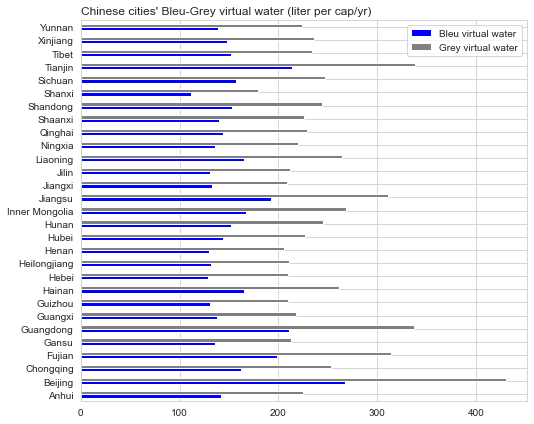

In [79]:
sns.set_style('whitegrid')
b = Bleu_foot.get('CHN').sum().to_frame()
b.columns = ['Bleu virtual water']
g = Grey_foot.get('CHN').sum().to_frame()
g.columns = ['Grey virtual water']
o = pd.concat([b,g], axis = 1)
o = o * 1000
# o = o.melt()
o.plot(kind = 'barh', figsize= (8, 7), ylabel = '', xlabel = '', color = ['b', 'grey'])
plt.title("Chinese cities' Bleu-Grey virtual water (liter per cap/yr)", loc = 'left');

In [15]:
## take the dfs 
Bleu = pd.concat([Bleu_foot.get(i) for i in Bleu_foot.keys()], axis =1)
Grey = pd.concat([Grey_foot.get(i) for i in Grey_foot.keys()], axis =1)

In [16]:
Bleu = pd.concat([sectors, Bleu * 1000], axis =1)
Grey = pd.concat([sectors, Grey * 1000], axis =1) 

In [17]:
Bleu = Bleu.melt(id_vars = ['Sector', 'Industry_category'], var_name = 'City')
Bleu['Type'] = 'Bleu water'
Grey = Grey.melt(id_vars = ['Sector', 'Industry_category'], var_name = 'City')
Grey['Type'] = 'Grey water'

In [18]:
tot = pd.concat([Bleu, Grey], axis = 0)

## EDA

In [19]:
tot.head(3)

,Sector,Industry_category,City,value,Type
0,Food,Primary industry,Algiers,0.0,Bleu water
1,Food,Primary industry,Algiers,0.0,Bleu water
2,Goods,Primary industry,Algiers,0.0,Bleu water


In [83]:
tot.groupby(['City', 'Type']).sum().reset_index()

,City,Type,value
0,Abidjan,Bleu water,23.979095
1,Abidjan,Grey water,42.891111
2,Addu,Bleu water,184.525248
3,Addu,Grey water,483.895588
4,Agneby-Tiassa,Bleu water,23.216644
...,...,...,...
367,Yunnan,Grey water,224.093537
368,Zacatlan,Bleu water,26.359645
369,Zacatlan,Grey water,27.082354
370,Zambezi,Bleu water,41.762193


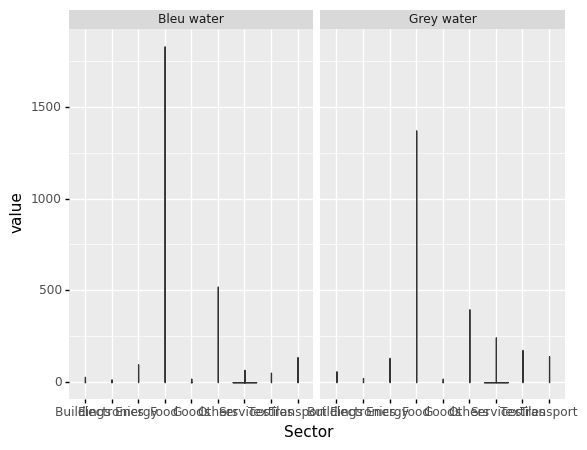

<ggplot: (158817902150)>

In [21]:
(ggplot(tot) + geom_violin(aes(x = 'Sector', y = 'value')) + facet_wrap('~Type'))

C:\Users\mhachaichi\Miniconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Set2 has a maximum of 8 colors Returning the palette you asked for with that many colors
C:\Users\mhachaichi\Miniconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Set2 has a maximum of 8 colors Returning the palette you asked for with that many colors


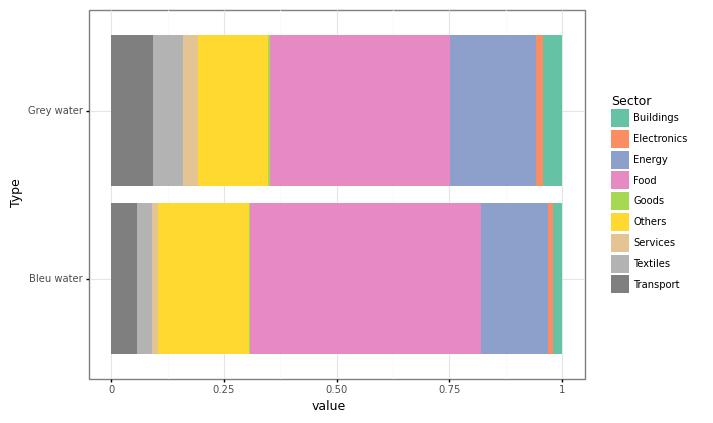

<ggplot: (158821385789)>

In [22]:
(ggplot(tot.groupby(['Type', 'Sector'])['value'].mean().to_frame().reset_index(), aes('Type', 'value', fill = 'Sector'))
    + theme_bw(base_size = 9)
    + geom_bar(stat = 'identity', position = 'fill')
    + coord_flip()
    + scale_fill_brewer(type = 'qual', palette = 7)
)

In [23]:
tot

,Sector,Industry_category,City,value,Type
0,Food,Primary industry,Algiers,0.000000,Bleu water
1,Food,Primary industry,Algiers,0.000000,Bleu water
2,Goods,Primary industry,Algiers,0.000000,Bleu water
3,Food,Light manufacturing,Algiers,144.989846,Bleu water
4,Textiles,Light manufacturing,Algiers,2.664690,Bleu water
...,...,...,...,...,...
4831,Services,Tertiary industry,Yunnan,0.000000,Grey water
4832,Services,Tertiary industry,Yunnan,14.949044,Grey water
4833,Goods,Tertiary industry,Yunnan,0.000000,Grey water
4834,Others,Light manufacturing,Yunnan,0.009714,Grey water


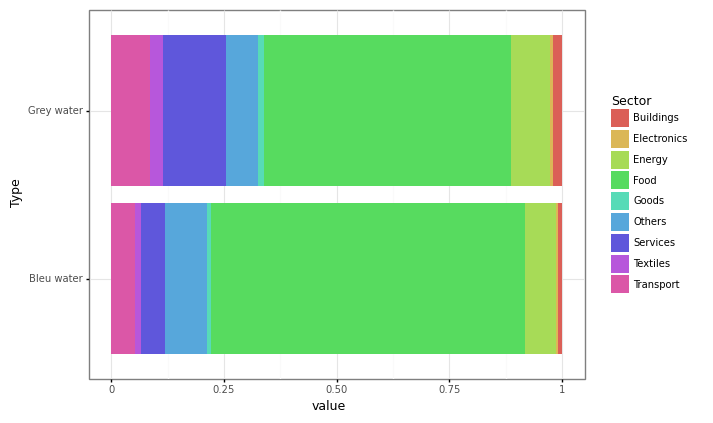

<ggplot: (158821394902)>

In [24]:
(ggplot(tot, aes('Type', 'value', fill = 'Sector'))
    + theme_bw(base_size = 9)
    + geom_bar(stat = 'identity', position = 'fill')
    + coord_flip()
)

C:\Users\mhachaichi\Miniconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Pastel2 has a maximum of 8 colors Returning the palette you asked for with that many colors
C:\Users\mhachaichi\Miniconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Pastel2 has a maximum of 8 colors Returning the palette you asked for with that many colors


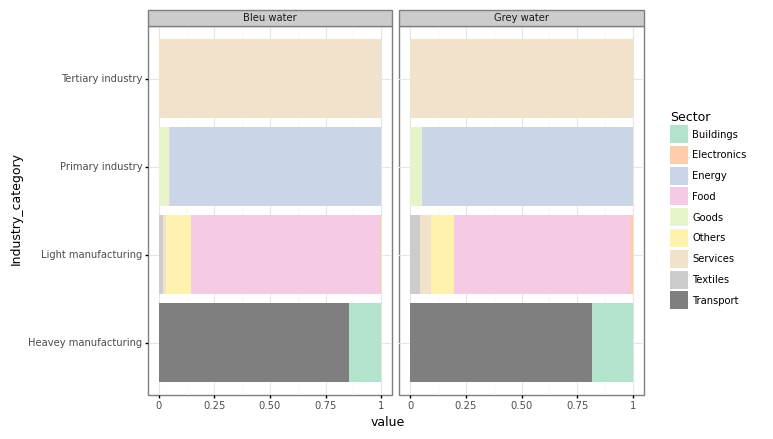

<ggplot: (158820128443)>

In [25]:
(ggplot(tot.groupby(['Sector', 'Type', 'Industry_category'])['value'].mean().to_frame().reset_index(), aes('Industry_category', 'value', fill = 'Sector'))
    + theme_bw(base_size = 9)
    + geom_bar(stat = 'identity', position = 'fill')
    + coord_flip()
    + facet_wrap('~Type')
    + scale_fill_brewer(type = 'qual', palette = 5)
)